Question 3c

In [237]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [238]:
TRAINDATA_FNAME = 'mnist_traindata.hdf5'
TESTDATA_FNAME = 'mnist_testdata.hdf5' 
DETECT_CLASS = 2

# Read training data from file
f = h5py.File('mnist_traindata.hdf5', 'r')
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    xdata_train = data['xdata'][:]
    ydata_train = data['ydata'][:]

    target = (ydata_train.argmax(axis=1) == DETECT_CLASS)

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    xdata_test = data['xdata'][:]
    ydata_test = data['ydata'][:]

    target_t = (ydata_test.argmax(axis=1) == DETECT_CLASS)

In [252]:
def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)

def soft_predict_t(w, b, X):
    px = softmax(np.dot(X, w.T)+b.T)
    acc = np.sum(np.argmax(px, axis=1) == np.argmax(ydata_test, axis=1))/len(X)
    return acc

def sgd_train(w, b, batch_size):
    lr = 0.0001
    ep = 100
    costs = []
    dw = 0
    db = 0
    acc = []
    count = 0
    test_pred_acc = []

    for i in range(ep):
        ep_loss = 0
        for idx in range(0, len(xdata_train), batch_size):
            batch_end_index = min(idx+batch_size, len(xdata_train))
            x,y = xdata_train[idx:batch_end_index], ydata_train[idx:batch_end_index]

            px = softmax(np.dot(x, w.T)+b.T)
            loss = -np.sum(y * np.log(px+10e-10))/len(x)
            ep_loss = ep_loss + loss
 
            dz = y - px
            dw = (-1/len(x)) * ((y.T - softmax(w @ x.T)) @ x)
            db = np.sum(dz)/len(x)

            w = w - lr * dw
            b = b - lr * db
        
            count = count + batch_size
            
        ep_loss = ep_loss/(xdata_train.shape[0]/batch_size)
        if count%5000 == 0:
            costs.append(ep_loss)
            acc.append(np.sum(np.argmax(px, axis=1) == np.argmax(y, axis=1))/len(x)*100)
            test_pred_acc.append(soft_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc


def sgd_train_t(w, b, batch_size):
    lr = 0.0001
    ep = 100
    costs = []
    dw = 0
    db = 0
    acc = []
    count = 0
    test_pred_acc = []

    for i in range(ep):
        ep_loss = 0
        for idx in range(0, len(xdata_test), batch_size):
            batch_end_index = min(idx+batch_size, len(xdata_test))
            x,y = xdata_test[idx:batch_end_index], ydata_test[idx:batch_end_index]

            px = softmax(np.dot(x, w.T)+b.T)
            loss = -np.sum(y * np.log(px+10e-10))/len(x)
            ep_loss = ep_loss + loss
 
            dz = y - px
            dw = (-1/len(x)) * ((y.T - softmax(w @ x.T)) @ x)
            db = np.sum(dz)/len(x)

            w = w - lr * dw
            b = b - lr * db
        
            count = count + batch_size
            
        ep_loss = ep_loss/(xdata_test.shape[0]/batch_size)
        if count%5000 == 0:
            costs.append(ep_loss)
            acc.append(np.sum(np.argmax(px, axis=1) == np.argmax(y, axis=1))/len(x)*100)
            test_pred_acc.append(soft_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc

def plot(train_costs, train_acc, test_acc, test_costs):

    plt.plot(list(range(len(train_costs))), train_costs, label = 'Train',color='blue')
    plt.plot(list(range(len(test_costs))), test_costs, label = 'Test', color='orange')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()

    plt.plot(list(range(len(train_acc))), train_acc, label = 'Train', color='blue')
    plt.plot(list(range(len(test_acc))), test_acc, label = 'Test', color='orange')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.show()

The Plots for Batch size = 1


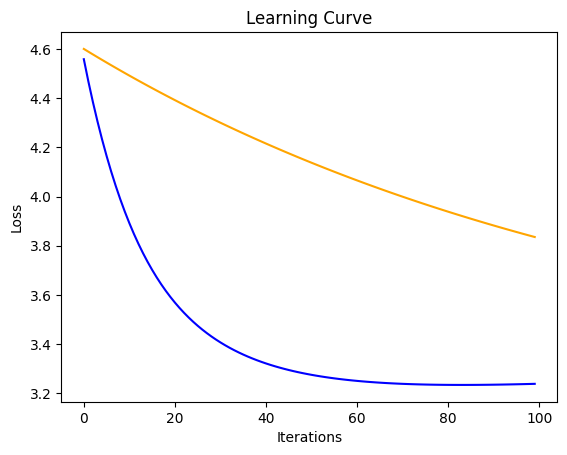

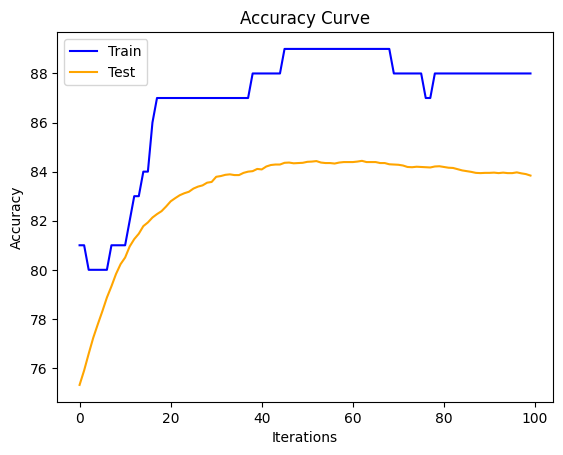

Training Accuracy with batch size 1 = 89.0%
Test Accuracy with batch size 1 =  84.44%
Final cost of training data with batch size 1 = 3.234752579049962
Final cost of test data with batch size 1 = 3.8355789214695677


In [251]:
w0 = np.zeros((10, 784))
b0 = np.zeros((10, 1))
sgd_train_acc, sgd_train_costs, sgd_w_opt, sgd_b_opt, sgd_test_acc = sgd_train(w0, b0, 1)
test_acc_t, test_costs, w_opt_t, b_opt_t, test_acc_tt = sgd_train_t(w0, b0, 1)
print("The Plots for Batch size = 1")
plot(sgd_train_costs, sgd_train_acc, sgd_test_acc, test_costs)


print("Training Accuracy with batch size 1 = " + str(max(sgd_train_acc)) + "%")
print("Test Accuracy with batch size 1 =  " + str(max(sgd_test_acc)) + "%")
print("Final cost of training data with batch size 1 = " + str(min(sgd_train_costs)))
print("Final cost of test data with batch size 1 = " + str(min(test_costs)))

The Plots for Batch size = 100


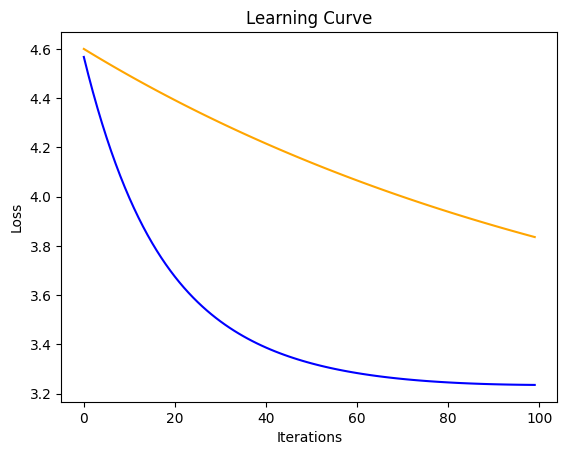

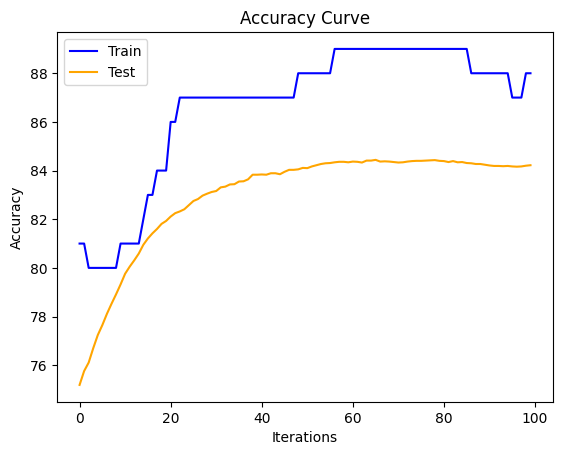

Training Accuracy with batch size 100 = 89.0%
Test Accuracy with batch size 100 =  84.44%
Final cost of training data with batch size 100 = 3.2350961389272426
Final cost of test data with batch size 100 = 3.8355789214695677


In [253]:
sgd_train_acc, sgd_train_costs, sgd_w_opt, sgd_b_opt, sgd_test_acc = sgd_train(w0, b0, 100)
test_acc_t, test_costs, w_opt_t, b_opt_t, test_acc_tt = sgd_train_t(w0, b0, 100)
print("The Plots for Batch size = 100")
plot(sgd_train_costs, sgd_train_acc, sgd_test_acc, test_costs)


print("Training Accuracy with batch size 100 = " + str(max(sgd_train_acc)) + "%")
print("Test Accuracy with batch size 100 =  " + str(max(sgd_test_acc)) + "%")
print("Final cost of training data with batch size 100 = " + str(min(sgd_train_costs)))
print("Final cost of test data with batch size 100 = " + str(min(test_costs)))

In [241]:
with h5py.File('data3c1.hd5','w') as hf:
    hf.create_dataset('W', data = np.asarray(sgd_w_opt))
    hf.create_dataset('b', data = np.asarray(sgd_b_opt.reshape(10,)))

i) The number of iterations required for accuracy to match batch gradient descent performance is 5. The accuracy at the end of the sixth iteration is 89%, which is  higher than the previous accuracy for 30 iterations. Since the batch size is 1, a low learning rate is used because the repetitions are 5000, implying that the update occurs for 5000 samples. The optimal learning rate for a batch size of 100 is found to be 0.0001

ii) Batch Graadient Descent computes the gradient of ythe cost function with respecy to the model paramets once per epoch, however SGD computes the gradient using only one data point at a time. For a batch size 1, the complexity will be O(N) and for i number of iterations O(iN)~O(N^2) if i=N. The accuracies of batch size 1 and 100 are almost similar. The lesser batch sizes converge faster compared to batch size N.

iii) It took 100 iterations with a learnning rate of 0.0001 to attain comparable results. 

iv) Batch sizes 1 and 100 converged before the end of 6 epochs, whereas batch size N took about 20 epochs to converge. For batch gradient descent the time complexity is O(Nd) where 'N' is the number of data points and 'd' is the number of features. To converge multiple epochs are required which implies O(Ne) where 'e' is the number of epochs. For a mini batch GD the complexity is O(mNd) where 'm' is the size of mini batch. Therefore the complexity depends on the learning rate, features and the nummber of data points.